## **Exploratory Data Analysis of Used Cars Dataset**

**Analysis Goals**

- **Descriptive Analysis:** Summarize the dataset to understand the distribution of various features such as year of manufacture, kilometers driven, fuel type, transmission, owner type, and seating capacity.
- **Price Analysis:** Investigate the factors affecting the resale price of cars. Analyze the relationship between the price and other features such as year, kilometers driven, fuel type, engine capacity, and power.
- **Geographical Insights:** Explore the geographical distribution of car sales and prices. Identify which locations have higher or lower average resale prices.
- **Trend Analysis:** Examine trends over time, such as how car prices have changed over the years and the impact of the year of manufacture on resale prices.
- **Missing Data Handling:** Address missing values in the dataset, particularly for the Mileage, Engine, Power, Seats, New_Price, and Price columns. Determine appropriate methods for handling or imputing these values, such as using mean, median, mode, or predictive modeling.
- **Correlation Analysis:** Conduct a correlation analysis to identify the strength and direction of relationships between different numerical features and the resale price.

### **Step 1: Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

### **Step 2: Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [46]:
data = pd.read_csv(r"D:\Python\Explorator Data Analysis\Car\Car\Car.csv")

Analyzing the Data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 7253 observations and 14 variables in our dataset

 
head() will display the top 5 observations of the dataset

data.head()

**tail()** will display the last 5 observations of the dataset

In [47]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [49]:
data.shape

(7253, 14)

In [50]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

**Missing Values Calculation**

isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [51]:
data.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [52]:
(data.isnull().sum()/(len(data)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [53]:
data.duplicated().sum()

np.int64(0)

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

### **Step 3: Data Reduction**

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column S.No have only ID values, assuming they don’t have any predictive power to predict the dependent variable.

In [54]:
# Remove S.No. column from data
data.drop(['S.No.', 'New_Price'], axis = 1, inplace=True)

In [55]:
# Impute Price with median (or use predictive imputation if necessary)
data['Price'].fillna(data['Price'].median(), inplace=True)

In [56]:
data.dropna(subset=['Seats','Mileage'], inplace=True)

In [57]:
data.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

We start our Feature Engineering as we need to add some columns required for analysis.

### **Step 4: Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

### **Step 4A: Creating Features**

We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car.

It would be difficult to find the car’s age if it is in year format as the Age of the car is a contributing factor to Car Price. 

Introducing a new column, “Car_Age” to know the age of the car

In [58]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [59]:
# Split the 'Power' column into two separate columns
data[['Power (Numeric)', 'Unit']] = data['Power'].str.split(' ', expand=True) #
data['Power (Numeric)'].replace({'null':'0'}, inplace=True) # Replace 'null' with '0' for numeric values
data['Power (Numeric)'] = data['Power (Numeric)'].astype('float') # Convert 'Power (Numeric)' to float

In [60]:
data[['Engine (Numeric)', 'Unit']] = data['Engine'].str.split(' ', expand=True)
data['Engine (Numeric)'] = data['Engine (Numeric)'].astype('int')

In [61]:
data[['Mileage (Numeric)', 'Unit']] = data['Mileage'].str.split(' ', expand=True)
data['Mileage (Numeric)'] = data['Mileage (Numeric)'].astype('float')

In [62]:
data.drop('Unit', axis=1, inplace=True)

In [63]:
date.today().year

2024

In [64]:
data['Car_Age']= date.today().year-data['Year']

In [65]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),Mileage (Numeric),Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,26.60,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,19.67,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,18.20,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,20.77,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,15.20,11


Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

In [66]:
data['Brand'] = data.Name.str.split().str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + ' ' + data.Name.str.split().str.get(2)
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT


In [67]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
'|'.join(searchfor)

'Isuzu|ISUZU|Mini|Land'

In [68]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),Mileage (Numeric),Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,187.70,2179,12.70,10,Land,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,115.00,2179,0.00,12,Land,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,23.00,112.00,1998,16.60,7,Mini,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,187.70,2179,12.70,6,Land,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,35.67,189.08,1998,16.82,7,Mini,Cooper Convertible


In [69]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [70]:
data['Model'].nunique()

716

In [71]:
data['Model'].unique()

array(['Wagon R', 'Creta 1.6', 'Jazz V', 'Ertiga VDI', 'A4 New',
       'EON LPG', 'Micra Diesel', 'Innova Crysta', 'Vento Diesel',
       'Indica Vista', 'Ciaz Zeta', 'City 1.5', 'Swift VDI',
       'Rover Range', 'Rover Freelander', 'Pajero Sport', 'Amaze S',
       'Swift DDiS', 'Duster 85PS', 'New C-Class', '3 Series', 'S Cross',
       'A6 2011-2015', 'i20 1.2', 'Vento Petrol', 'City Corporate',
       'Alto K10', 'WRV i-VTEC', 'Innova 2.5', 'Duster 110PS',
       'Corolla Altis', 'Ssangyong Rexton', 'A6 2.7', 'Vento 1.6',
       'Vitara Brezza', 'KUV 100', 'M-Class ML', 'Polo Diesel',
       'Alto LXi', 'Nano LX', 'i20 Magna', 'Elantra 2.0', 'Elantra CRDi',
       'Xcent 1.1', 'Thar CRDe', 'A4 2.0', 'Swift LDI', 'Swift Ldi',
       'Grand i10', 'Vento 2013-2015', 'KWID RXT', 'i10 Asta',
       'X-Trail SLX', 'Zen Estilo', 'Figo Diesel', 'Indica V2', 'City ZX',
       'C-Class Progressive', 'Ertiga SHVS', 'Creta 1.4',
       'Cayenne 2009-2014', 'XUV500 W8', 'i10 Sportz', 'Terrano

In [72]:
data['Model'] = data["Model"].str.lower()

In [73]:
car_model = data["Model"].nunique()
car_model

695

In [87]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (Numeric),Engine (Numeric),Mileage (Numeric),Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,26.60,14,Maruti,wagon r
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,19.67,9,Hyundai,creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,18.20,13,Honda,jazz v
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,20.77,12,Maruti,ertiga vdi
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,15.20,11,Audi,a4 new


In [76]:
data.shape

(7198, 18)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7198 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7198 non-null   object 
 1   Location           7198 non-null   object 
 2   Year               7198 non-null   int64  
 3   Kilometers_Driven  7198 non-null   int64  
 4   Fuel_Type          7198 non-null   object 
 5   Transmission       7198 non-null   object 
 6   Owner_Type         7198 non-null   object 
 7   Mileage            7198 non-null   object 
 8   Engine             7198 non-null   object 
 9   Power              7198 non-null   object 
 10  Seats              7198 non-null   float64
 11  Price              7198 non-null   float64
 12  Power (Numeric)    7198 non-null   float64
 13  Engine (Numeric)   7198 non-null   int64  
 14  Mileage (Numeric)  7198 non-null   float64
 15  Car_Age            7198 non-null   int64  
 16  Brand              7198 non-n

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

### **Step 5: EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

### **Step 6: Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7198.0,2013.391081,3.235298,1996.00,2011.0000,2014.00,2016.00,2019.00
Kilometers_Driven,7198.0,58631.777160,84694.798141,171.00,34000.0000,53253.00,73000.00,6500000.00
Seats,7198.0,5.279800,0.811759,0.00,5.0000,5.00,5.00,10.00
Price,7198.0,8.845521,10.311835,0.44,3.8725,5.64,8.41,160.00
Power (Numeric),7198.0,110.829464,55.044446,0.00,74.0000,91.72,138.03,616.00
Engine (Numeric),7198.0,1616.900389,595.034653,624.00,1198.0000,1493.00,1968.00,5998.00
Mileage (Numeric),7198.0,18.184266,4.504070,0.00,15.2150,18.19,21.10,33.54
Car_Age,7198.0,10.608919,3.235298,5.00,8.0000,10.00,13.00,28.00


In [79]:
data.describe(include='object').T

,count,unique,top,freq
Name,7198,2015,Mahindra XUV500 W8 2WD,55
Location,7198,11,Mumbai,943
Fuel_Type,7198,4,Diesel,3838
Transmission,7198,2,Manual,5163
Owner_Type,7198,4,First,5921
Mileage,7198,450,17.0 kmpl,205
Engine,7198,149,1197 CC,732
Power,7198,385,74 bhp,280
Brand,7198,32,Maruti,1428
Model,7197,695,swift dzire,189


From the statistics summary, we can infer the below findings :

- Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
- On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
- Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
- It looks like Engine and Power have outliers, and the data is right-skewed.
- The average number of seats in a car is 5. car seat is an important feature in price contribution.
- The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

describe(include=’all’) provides a statistics summary of all data, include object, category etc

In [80]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Brand', 'Model']
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Power (Numeric)', 'Engine (Numeric)', 'Mileage (Numeric)', 'Car_Age']


### **Step 7: EDA Univariate Analysis**

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

Year


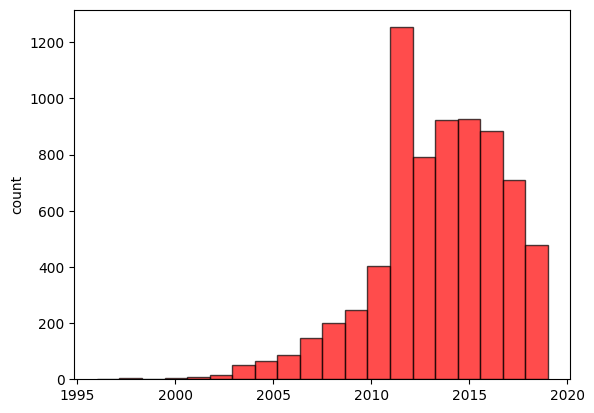

Kilometers_Driven


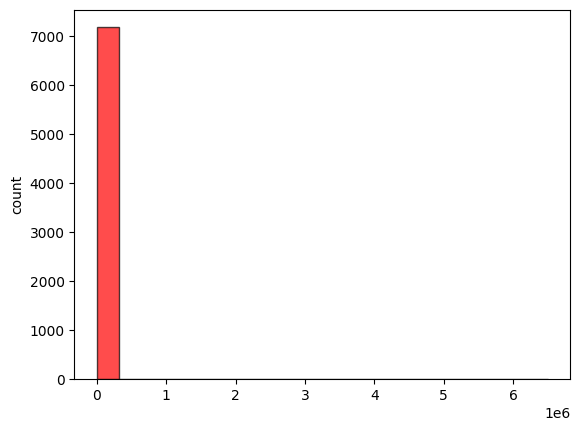

Seats


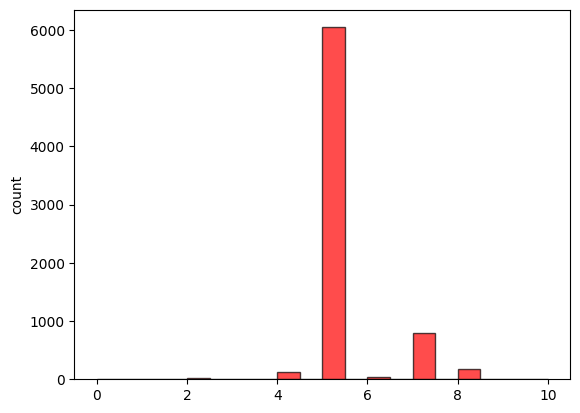

Price


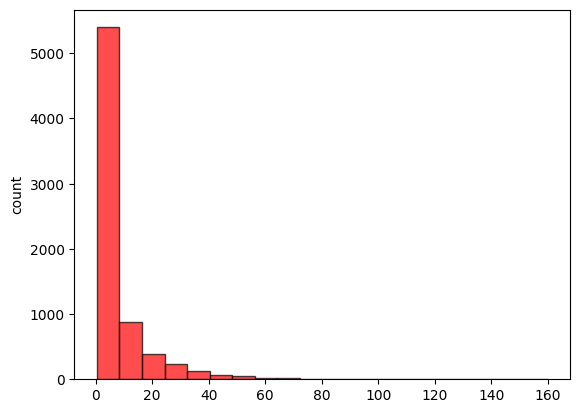

Power (Numeric)


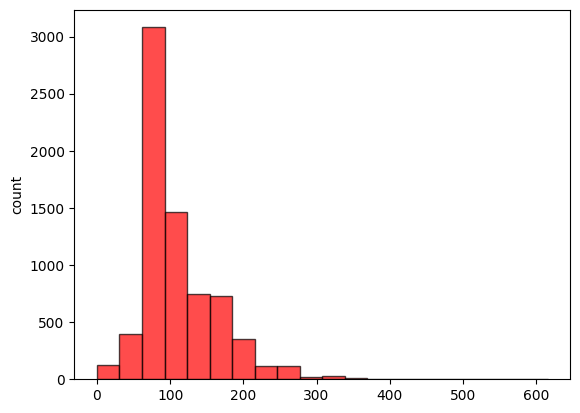

Engine (Numeric)


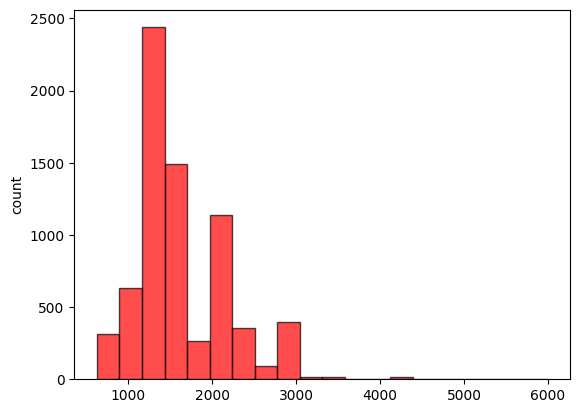

Mileage (Numeric)


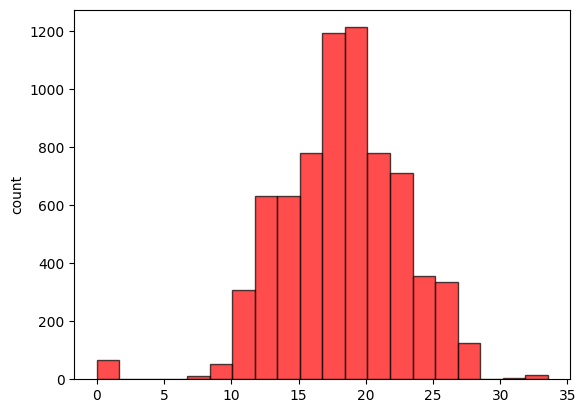

Car_Age


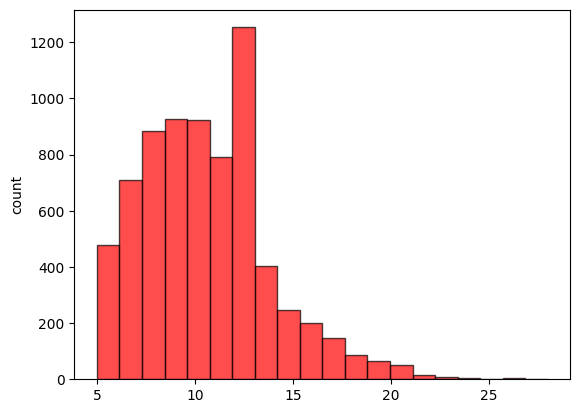

In [81]:
for col in num_cols:
    print(col)
    plt.subplot(1, 1, 1)
    data[col].hist(grid=False, bins=20, edgecolor='black', alpha=0.7, color='red')
    plt.ylabel('count')
    plt.show()

In [82]:
cat_col = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type','Brand', 'Model']

Location


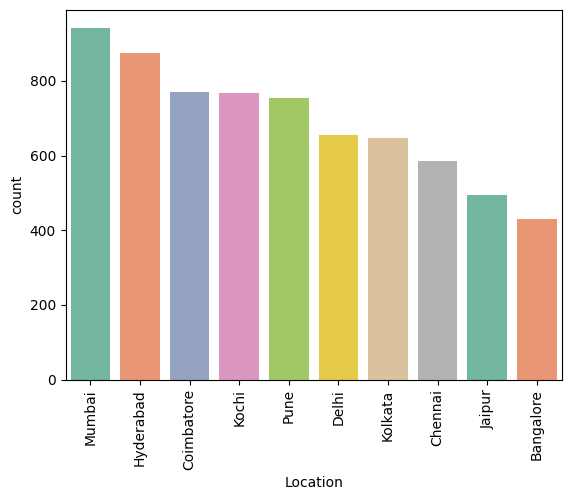

Fuel_Type


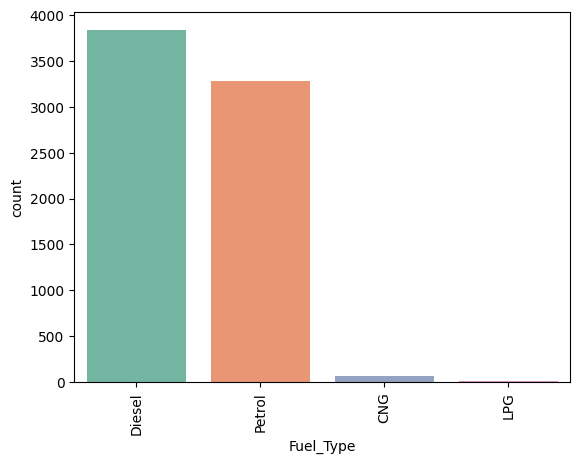

Transmission


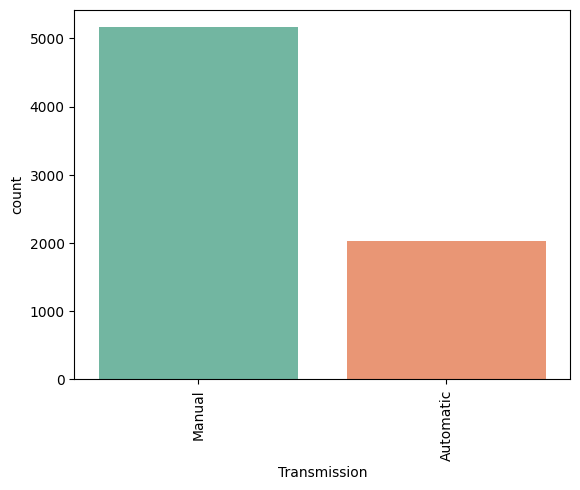

Owner_Type


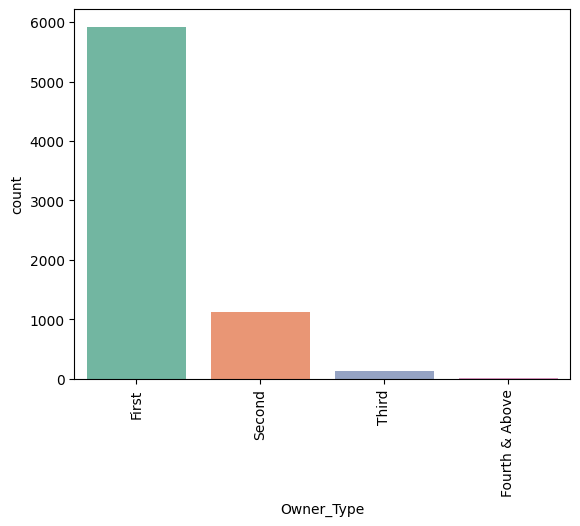

Brand


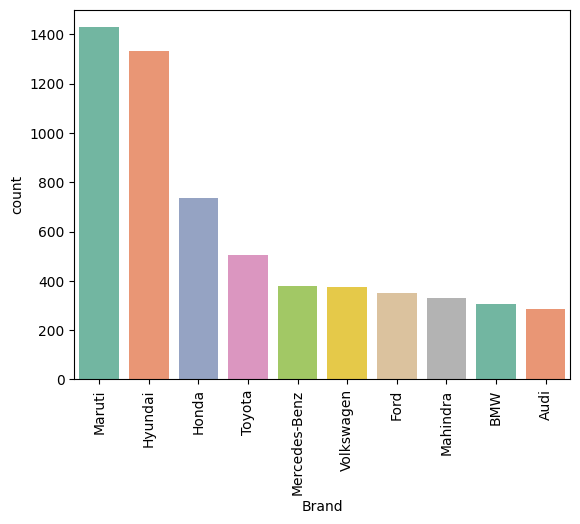

Model


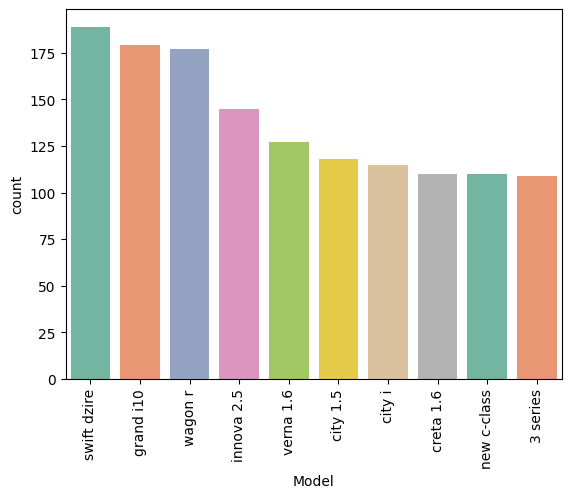

In [83]:
for col in cat_col:
    print(col)
    sns.countplot(x=col, data=data, order=data[col].value_counts().head(10).index, palette="Set2")
    plt.xticks(rotation=90)
    plt.show()

### **8: EDA Bivariate Analysis**

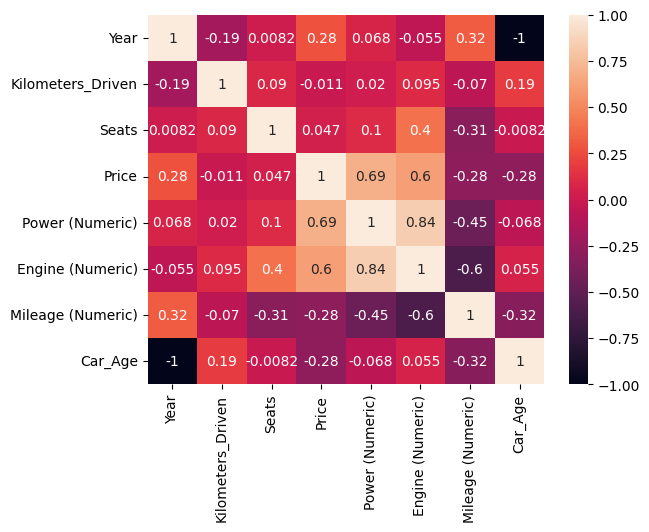

In [84]:
#plt.figure(figsize=(13,17))
#sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True)
plt.show()

Pair Plot provides below insights:

- The variable Year has a positive correlation with price and mileage
- A year has a Negative correlation with kilometers-Driven
- Mileage is negatively correlated with Power
- As power increases, mileage decreases
- Car with recent make is higher at prices. As the age of the car increases price decreases
- Engine and Power increase, and the price of the car increases

A bar plot can be used to show the relationship between Categorical variables and continuous variables 

From the count plot, we can have below observations

- Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
- ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
- ~72% of cars have manual transmission
- ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
- ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
- WagonR ranks first among all models which are available for purchase



### **9: EDA Bivariate Analysis**

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

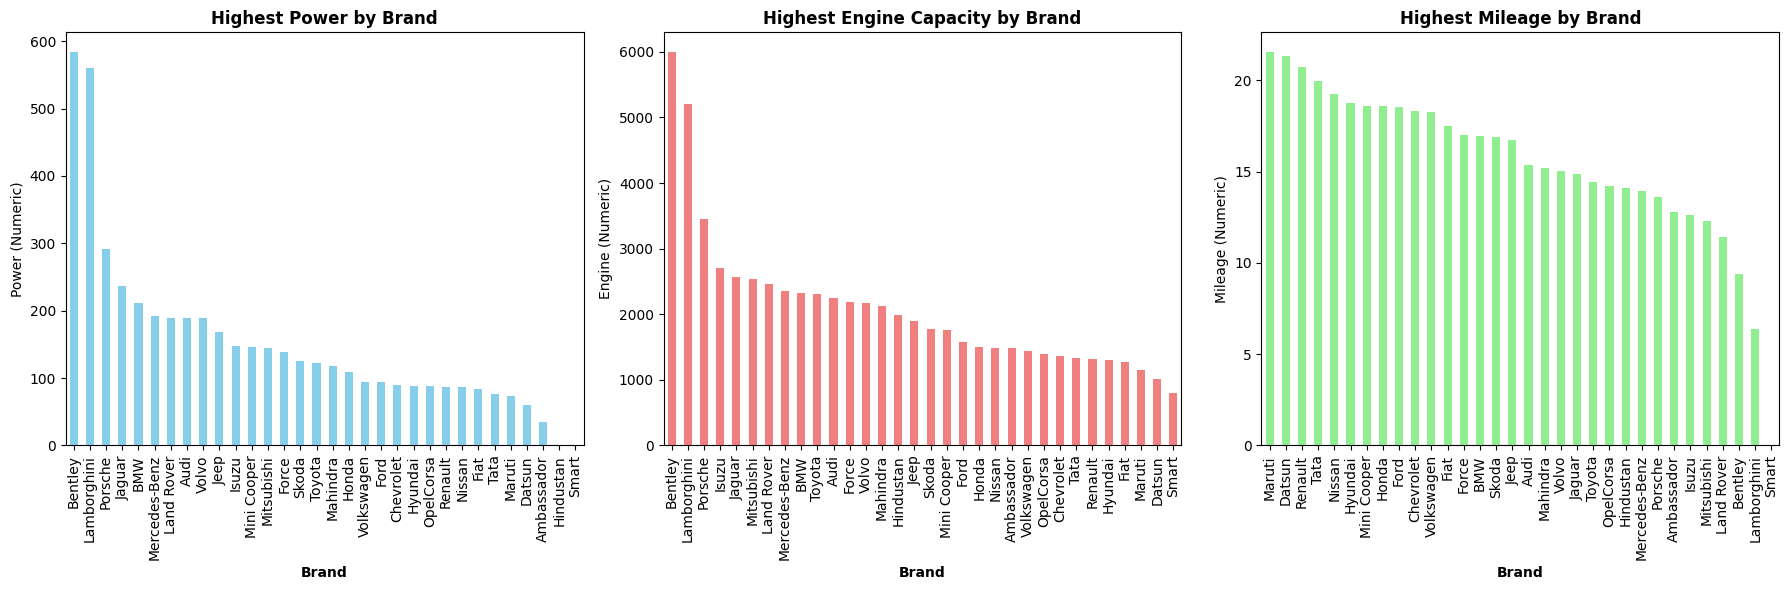

In [85]:
# Group by Brand and find the maximum values for Power, Engine, and Mileage
power = data.groupby('Brand')['Power (Numeric)'].mean().sort_values(ascending=False)
engine = data.groupby('Brand')['Engine (Numeric)'].mean().sort_values(ascending=False)
mileage = data.groupby('Brand')['Mileage (Numeric)'].mean().sort_values(ascending=False)

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot Power
power.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Highest Power by Brand', fontweight='bold')
ax[0].set_ylabel('Power (Numeric)')
ax[0].set_xlabel('Brand', fontweight='bold')

# Plot Engine
engine.plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title('Highest Engine Capacity by Brand', fontweight='bold')
ax[1].set_ylabel('Engine (Numeric)')
ax[1].set_xlabel('Brand', fontweight='bold')

# Plot Mileage
mileage.plot(kind='bar', ax=ax[2], color='lightgreen')
ax[2].set_title('Highest Mileage by Brand', fontweight='bold')
ax[2].set_ylabel('Mileage (Numeric)')
ax[2].set_xlabel('Brand', fontweight='bold')

plt.tight_layout() # Adjust spacing between subplots
plt.show()

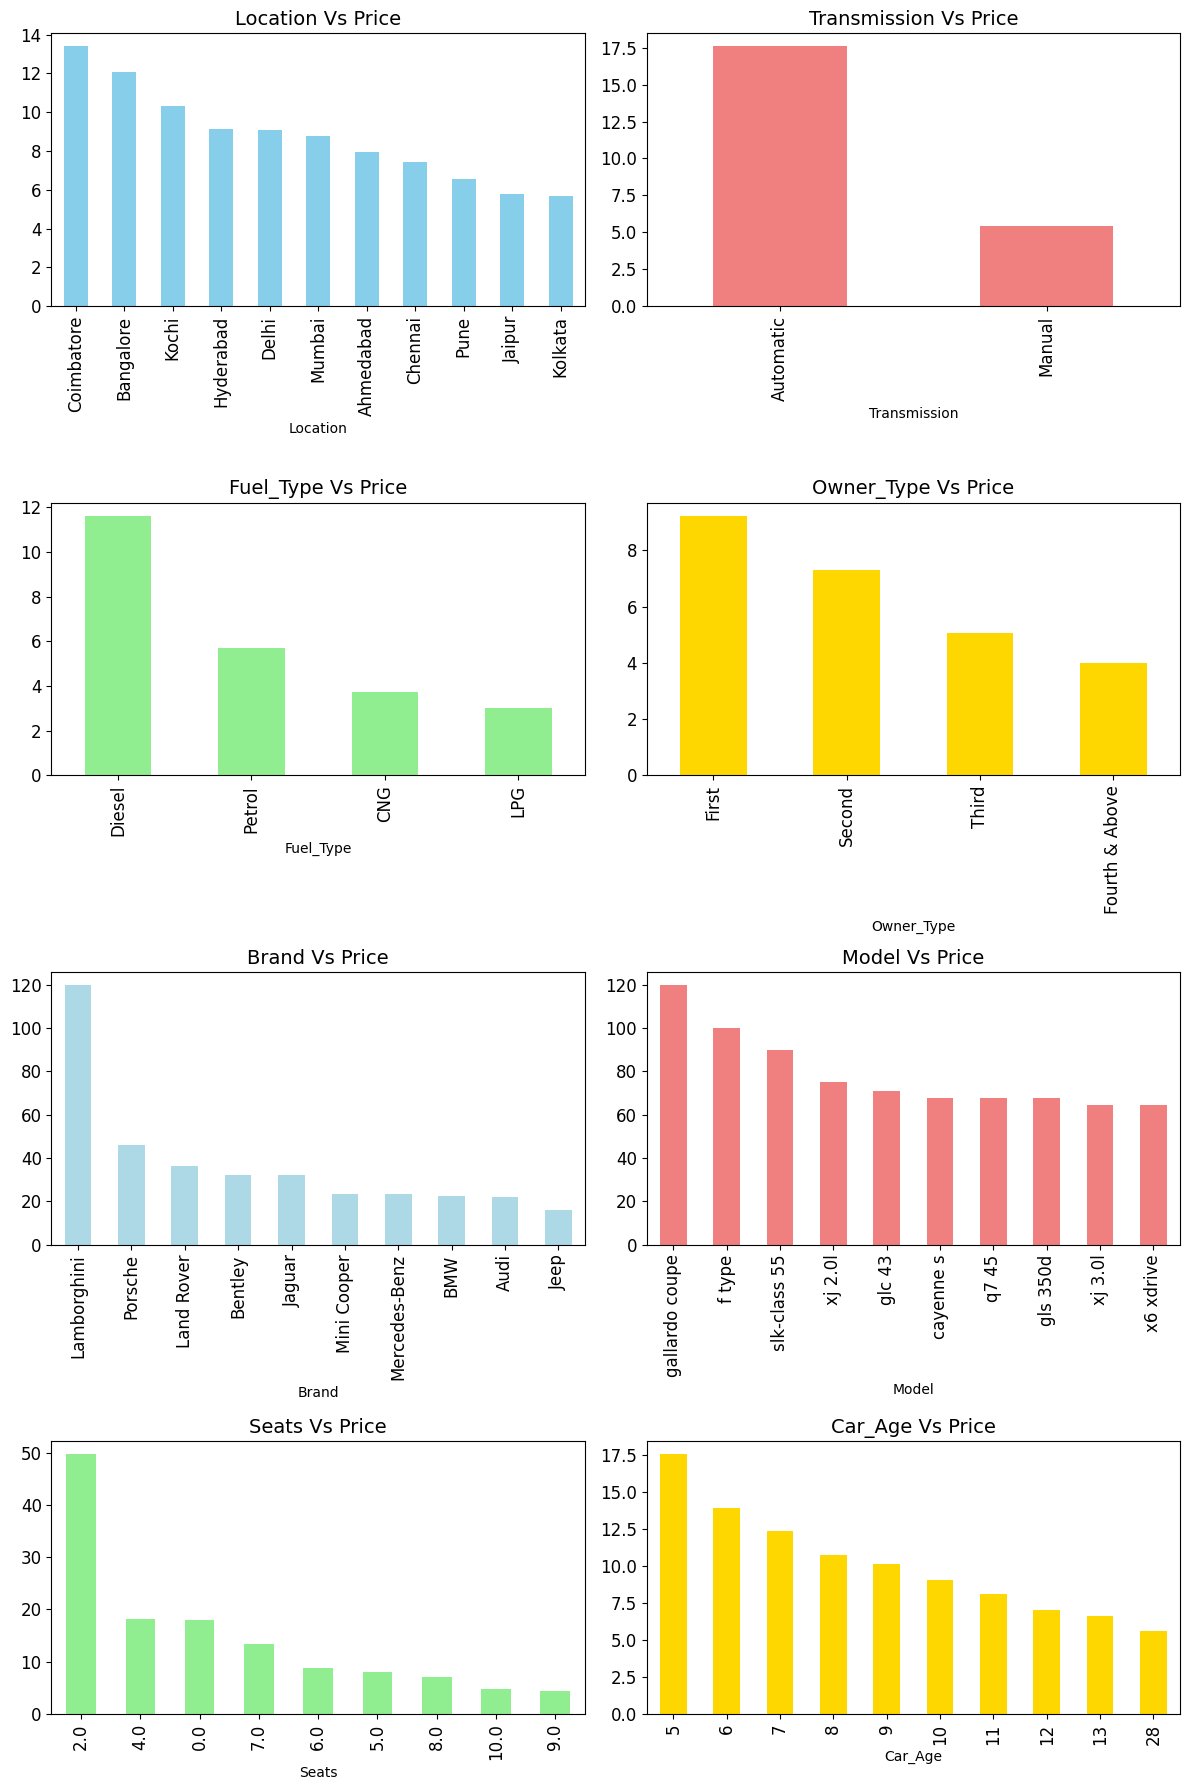

In [86]:
# Define features and titles for plotting
features = [
    ('Location', 'Location Vs Price', 'skyblue'),
    ('Transmission', 'Transmission Vs Price', 'lightcoral'),
    ('Fuel_Type', 'Fuel_Type Vs Price', 'lightgreen'),
    ('Owner_Type', 'Owner_Type Vs Price', 'gold'),
    ('Brand', 'Brand Vs Price', 'lightblue'),
    ('Model', 'Model Vs Price', 'lightcoral'),
    ('Seats', 'Seats Vs Price', 'lightgreen'),
    ('Car_Age', 'Car_Age Vs Price', 'gold')
]

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

for i, (feature, title, color) in enumerate(features):
    row, col = divmod(i, 2)  # Calculate subplot indices
    if feature in ['Brand', 'Model', 'Car_Age']:  # Handle cases where we limit the number of bars
        data.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    else:
        data.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    axarr[row][col].set_title(title, fontsize=14)

plt.tight_layout()
plt.show()

Observations

- The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
- Automatic cars have more price than manual cars.
- Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
- First-owner cars are higher in price, followed by a second
- The third owner’s price is lesser than the Fourth and above
- Lamborghini brand is the highest in price
- Gallardocoupe Model is the highest in price
- 2 Seater has the highest price followed by 4 Seater
- The latest model cars are high in price

### **Conclusion**
Car prices are influenced by where you buy them, whether they're automatic or manual, the type of fuel they use, how many owners they've had, the brand and model, the number of seats, and how new they are. Knowing these trends can guide buyers in making smart choices based on their preferences and budget.